In [ ]:
#Implementation of Deutsch-Jozsa Algorithm

In [3]:
#import qiskit wrk-tools:
import numpy as np
from qiskit import IBMQ, BasicAer
from qiskit.providers.ibmq import least_busy
from qiskit import QuantumCircuit, execute
from qiskit.tools.jupyter import *

#for visualization
from qiskit.visualization import plot_histogram

provider = IBMQ.load_account()

Matplotlib is building the font cache; this may take a moment.


In [4]:
#settings:
n = 3
bit_string = "011"

In [5]:
## 1.Construct mu constant oracle:

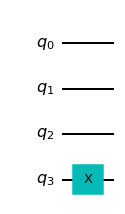

In [10]:
constant_oracle = QuantumCircuit(n+1)

output_qubit = np.random.randint(2)

if output_qubit == 1:
    constant_oracle.x(n)#makes the output qubit 1

constant_oracle.draw()

In [ ]:
#construct my balanced oracle:

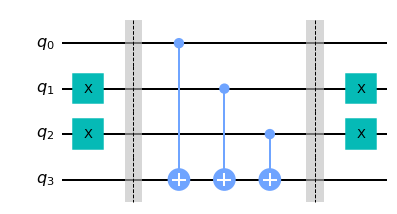

In [11]:
balanced_oracle = QuantumCircuit(n+1)

#convering my input qubit qhich were |0> according to bit-string:
for qubit in range(n):
    if bit_string[qubit] == '1':
        balanced_oracle.x(qubit)
        
#adding a barrier:
balanced_oracle.barrier()

#Take care of my output qubit:
for qubit in range(n):
    balanced_oracle.cx(qubit, n)
    
#adding a barrier:
balanced_oracle.barrier()

#wrap-up the NOT gates:
for qubit in range(n):
    if bit_string[qubit] == '1':
        balanced_oracle.x(qubit)
        
balanced_oracle.draw()

In [ ]:
## Assembling the D-J circuit:

In [12]:
### a) state preparation:

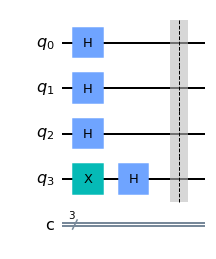

In [14]:
dj_qc = QuantumCircuit(n+1, n)

#initialize all input qubits to |+>
for qubit in range(n):
    dj_qc.h(qubit)
    
#initialize the output of qubit to |->:
dj_qc.x(n) #X|0> = |1>
dj_qc.h(n) #H|1> = |->

#adding a barrier:
dj_qc.barrier()

dj_qc.draw()

In [ ]:
### b) Applying the oracles:

/tmp/ipykernel_446/3936622230.py:1: DeprecationWarning: The QuantumCircuit.__iadd__() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  dj_qc += balanced_oracle
/opt/conda/lib/python3.8/site-packages/qiskit/circuit/quantumcircuit.py:942: DeprecationWarning: The QuantumCircuit.extend() method is being deprecated. Use the compose() (potentially with the inplace=True argument) and tensor() methods which are more flexible w.r.t circuit register compatibility.
  return self.extend(rhs)


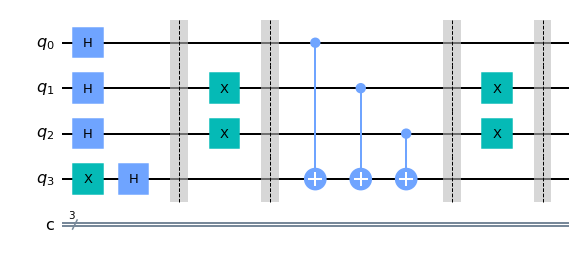

In [15]:
dj_qc += balanced_oracle

#adding a barrier:
dj_qc.barrier()

dj_qc.draw()

In [ ]:
### c) Performing superposition and measuring :

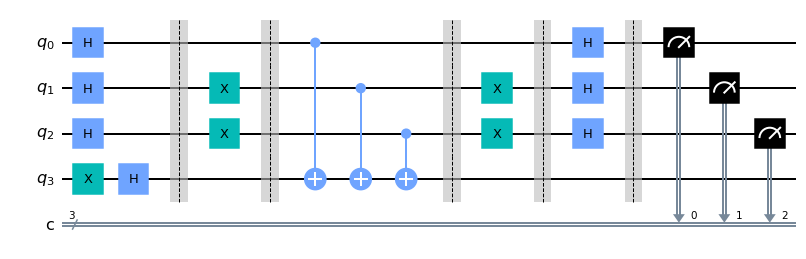

In [17]:
#Apply H-gates:
for qubit in range(n):
    dj_qc.h(qubit)

#adding a barrier:
dj_qc.barrier()

#measure the qubits:
for i in range(n):
    dj_qc.measure(i, i)

dj_qc.draw()

In [ ]:
## d) Output time!

In [ ]:
on local simulator:

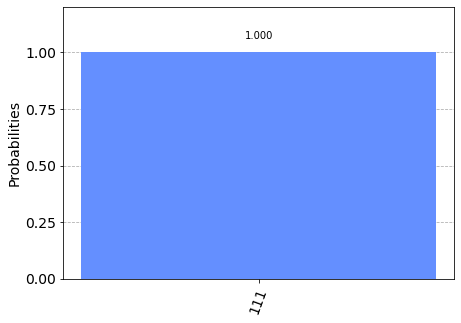

In [18]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024

#Getting the results after the execution:
results = execute(dj_qc, backend = backend, shots = shots).result()

#Get the data to plot:
answer = results.get_counts()

#plot the histogram
plot_histogram(answer)

In [20]:
provider = IBMQ.get_provider(hub = 'ibm-q')

In [22]:
#check all the quantum devices:
all_providers = provider.backends()
for device in all_providers:
    print(device)

ibmq_qasm_simulator
ibmq_armonk
ibmq_santiago
ibmq_bogota
ibmq_lima
ibmq_belem
ibmq_quito
simulator_statevector
simulator_mps
simulator_extended_stabilizer
simulator_stabilizer
ibmq_manila


In [ ]:
desired_filter = lamda x: x.configuration().n_qubits >= (n +1) and not x.configuration().simulator and x.status().operational == True

desired_providers = provide.backend(filters = desired_filter)
for device in desired_providers:
    print(device)
    

In [30]:
qcomp = provider.get_backend('ibmq_quito')

#print(f"The least  busy backend is{qcom}")

%qiskit_job_watcher

job = execute(dj_qc, backend = qcomp, shots = shots)


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

In [ ]:
#generalized D-J algorithm:

In [40]:
def phase_oracle (case, n):
    '''
    Arguments:
        case: Strings. Whether the function is balanced or constant.
        n: Integer . The number of qubits
    Returns: A QuantumCircuit objects with (n+1) qubits.
    '''
    
    oracle_qc = QuantumCircuit(n+1)
    
    if case == "balanced":
        for qubit in range(n):
            oracle_qc.cx(qubit, n)
            
    if case == "constant":
        output = np.random.randint(2)
        if output == 1:
            oracle_qc.x(n)#flip the last qubit
            
    oracle_gate = oracle_qc.to_gate()
    oracle_gate.name = "Phase Oracle"
    
    return oracle_gate

In [41]:
def  deutsch_josa(n, case = "anything"):
    
    dj_qc = QuantumCircuit(n+1, n)
    
    for qubit in range(n):
        dj_qc.h(qubit)
    dj_qc.x(n)
    dj_qc.h(n)
    
    #what is f(x) balanced or constant
    if case == "anything":
        case_is = np.random.randint(2)
        if case_is == 0:
            case = "constant"
        else:
            case = "balanced"
            
    #append the phase oracle:
    ph_oracle = phase_oracle(case, n)
    dj_qc.append(ph_oracle, range(n+1))#for all the qubits
    
    #send the qubits to suerposition and measure:
    for i in range(n):
        dj_qc.h(i)
        dj_qc.measure(i, i)
        
    return dj_qc

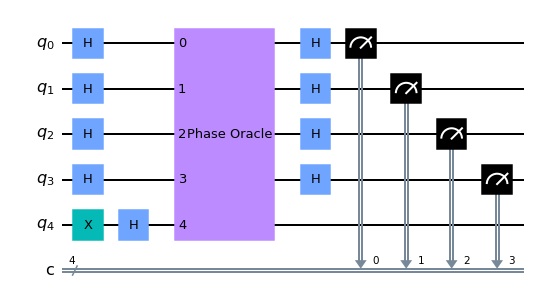

In [42]:
n = 4
final_dj_qc = deutsch_josa(n, "constant")
final_dj_qc.draw()

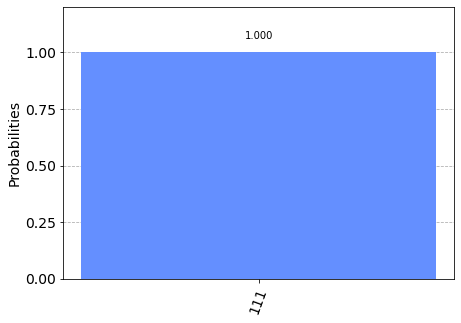

In [43]:
backend = BasicAer.get_backend('qasm_simulator')
shots = 1024

#Getting the results after the execution:
results = execute(dj_qc, backend = backend, shots = shots).result()

#Get the data to plot:
answer = results.get_counts()

#plot the histogram
plot_histogram(answer)

In [45]:
qcomp = provider.get_backend('ibmq_quito')

%qiskit_job_watcher
job = execute(dj_qc, backend = qcomp, shots = shots)

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

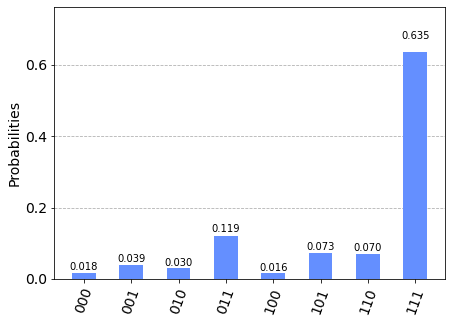

In [31]:
results = job.result(dj_qc)
plot_histogram(results.get_counts())